# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____

____
We'll focus on stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2019.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [6]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
from plotly.offline import init_notebook_mode, iplot, plot, download_plotlyjs
import cufflinks as cf
cf.go_offline()
init_notebook_mode(connected= True)
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
* Qualcomm
* Cisco
* Google
* Verizon
* Amazon

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2019 for each of these stocks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Google
    GOOG = data.DataReader("GOOG", 'yahoo', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK. 
------------

In [7]:
start = datetime.datetime(2006, 5, 29)
end = datetime.datetime(2019,5,29)

In [8]:
# Aamazon
AMZN = data.DataReader('AMZN', 'yahoo', start, end)
# Cisco
CSCO = data.DataReader('CSCO', 'yahoo', start, end)
# Google
GOOG = data.DataReader('GOOG', 'yahoo', start, end)
# Qualcomm
QCOM = data.DataReader('QCOM', 'yahoo', start, end)
# Verizon
VZ = data.DataReader('VZ', 'yahoo', start, end)

In [15]:
VZ.head()

High        Low       Open      Close      Volume  Adj Close
Date                                                                         
2006-05-30  28.283701  27.771088  28.157795  27.798067   8348600.0  14.586324
2006-05-31  28.103836  27.663168  27.825047  28.067863  11499400.0  14.727895
2006-06-01  28.832287  28.202761  28.310680  28.742355  12954400.0  15.081818
2006-06-02  28.985172  28.643431  28.742355  28.724369   9677400.0  15.072380
2006-06-05  28.868261  28.364639  28.562490  28.373632   7370500.0  14.888332

** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [11]:
tickers = 'AMZN CSCO GOOG QCOM VZ'.split()
tickers

['AMZN', 'CSCO', 'GOOG', 'QCOM', 'VZ']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [20]:
stocks = pd.concat([AMZN, CSCO, GOOG, QCOM, VZ], axis = 1, keys = tickers)
stocks.head()

AMZN                                                       \
                 High        Low       Open      Close   Volume  Adj Close   
Date                                                                         
2006-05-30  35.750000  34.439999  35.730000  34.639999  5920800  34.639999   
2006-05-31  34.939999  33.730000  34.740002  34.610001  5196600  34.610001   
2006-06-01  35.450001  34.299999  34.630001  35.070000  5932000  35.070000   
2006-06-02  35.220001  34.049999  35.189999  34.759998  5442900  34.759998   
2006-06-05  34.540001  33.270000  34.459999  33.490002  5049400  33.490002   

                 CSCO                                   ...       QCOM  \
                 High        Low       Open      Close  ...       Open   
Date                                                    ...              
2006-05-30  20.230000  19.770000  20.200001  19.770000  ...  45.610001   
2006-05-31  20.030001  19.510000  19.809999  19.680000  ...  44.730000   
2006-06-01  20.500000  19.670000  19.680000  20.500000  ...  45.200001   
2006-06-02  20.799999  20.350000  20.600000  20.440001  ...  47.599998   
2006-06-05  20.370001  19.879999  20.350000  19.879999  ...  46.669998   

                                                     VZ                        \
                Close      Volume  Adj Close       High        Low       Open   
Date                                                                            
2006-05-30  44.720001  14906500.0  32.977036  28.283701  27.771088  28.157795   
2006-05-31  45.209999  13529800.0  33.338379  28.103836  27.663168  27.825047   
2006-06-01  47.049999  15979600.0  34.695202  28.832287  28.202761  28.310680   
2006-06-02  47.000000  11744300.0  34.658325  28.985172  28.643431  28.742355   
2006-06-05  45.680000  11276000.0  33.684952  28.868261  28.364639  28.562490   

                                              
                Close      Volume  Adj Close  
Date                                          
2006-05-30  27.798067   8348600.0  14.586324  
2006-05-31  28.067863  11499400.0  14.727895  
2006-06-01  28.742355  12954400.0  15.081818  
2006-06-02  28.724369   9677400.0  15.072380  
2006-06-05  28.373632   7370500.0  14.888332  

[5 rows x 30 columns]

** Set the column name levels.

In [26]:
stocks.columns.names = ['Stock Ticker', 'Stock Info']


** Check the head of the bank_stocks dataframe.**

In [25]:
stocks.head()

Stock Ticker       AMZN                                                       \
Stock Info         High        Low       Open      Close   Volume  Adj Close   
Date                                                                           
2006-05-30    35.750000  34.439999  35.730000  34.639999  5920800  34.639999   
2006-05-31    34.939999  33.730000  34.740002  34.610001  5196600  34.610001   
2006-06-01    35.450001  34.299999  34.630001  35.070000  5932000  35.070000   
2006-06-02    35.220001  34.049999  35.189999  34.759998  5442900  34.759998   
2006-06-05    34.540001  33.270000  34.459999  33.490002  5049400  33.490002   

Stock Ticker       CSCO                                   ...       QCOM  \
Stock Info         High        Low       Open      Close  ...       Open   
Date                                                      ...              
2006-05-30    20.230000  19.770000  20.200001  19.770000  ...  45.610001   
2006-05-31    20.030001  19.510000  19.809999  19.680000  ...  44.730000   
2006-06-01    20.500000  19.670000  19.680000  20.500000  ...  45.200001   
2006-06-02    20.799999  20.350000  20.600000  20.440001  ...  47.599998   
2006-06-05    20.370001  19.879999  20.350000  19.879999  ...  46.669998   

Stock Ticker                                           VZ             \
Stock Info        Close      Volume  Adj Close       High        Low   
Date                                                                   
2006-05-30    44.720001  14906500.0  32.977036  28.283701  27.771088   
2006-05-31    45.209999  13529800.0  33.338379  28.103836  27.663168   
2006-06-01    47.049999  15979600.0  34.695202  28.832287  28.202761   
2006-06-02    47.000000  11744300.0  34.658325  28.985172  28.643431   
2006-06-05    45.680000  11276000.0  33.684952  28.868261  28.364639   

Stock Ticker                                               
Stock Info         Open      Close      Volume  Adj Close  
Date                                                       
2006-05-30    28.157795  27.798067   8348600.0  14.586324  
2006-05-31    27.825047  28.067863  11499400.0  14.727895  
2006-06-01    28.310680  28.742355  12954400.0  15.081818  
2006-06-02    28.742355  28.724369   9677400.0  15.072380  
2006-06-05    28.562490  28.373632   7370500.0  14.888332  

[5 rows x 30 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each stock throughout the time period?**

In [30]:
stocks.xs(key = 'Close', axis = 1, level= 'Stock Info')
stocks.xs(key = 'Close', axis = 1, level = 'Stock Info').max()

Stock Ticker
AMZN    2039.510010
CSCO      56.950001
GOOG    1287.579956
QCOM      89.290001
VZ        60.880001
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [31]:
returns = pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [35]:
tickers
for tick in tickers:
    returns[tick + ' Returns'] = stocks[tick]['Close'].pct_change()
returns
    

AMZN Returns  CSCO Returns  GOOG Returns  QCOM Returns  VZ Returns
Date                                                                          
2006-05-30           NaN           NaN           NaN           NaN         NaN
2006-05-31     -0.000866     -0.004552     -0.000323      0.010957    0.009706
2006-06-01      0.013291      0.041667      0.029046      0.040699    0.024031
2006-06-02     -0.008840     -0.002927     -0.008311     -0.001063   -0.000626
2006-06-05     -0.036536     -0.027397     -0.013177     -0.028085   -0.012210
2006-06-06     -0.002389      0.014588      0.041529      0.010727    0.004754
2006-06-07      0.010775     -0.012890     -0.008923     -0.014945    0.004416
2006-06-08     -0.006515     -0.001005      0.017567     -0.022647   -0.005653
2006-06-09      0.006855      0.004022     -0.017112     -0.022722   -0.005054
2006-06-12     -0.005329     -0.024537     -0.013012     -0.051796   -0.005397
2006-06-13     -0.003869     -0.006160      0.013052      0.015781    0.007022
2006-06-14      0.006274      0.012913     -0.005511      0.033700    0.002219
2006-06-15      0.038005      0.031107      0.017196      0.037919    0.018027
2006-06-16      0.003719     -0.011869     -0.000767     -0.020940    0.010873
2006-06-19     -0.000570     -0.008008     -0.006552     -0.012742   -0.011371
2006-06-20      0.011691     -0.004541     -0.002499      0.011984    0.017718
2006-06-21      0.032976      0.017233      0.038639      0.006604    0.003971
2006-06-22     -0.007640     -0.018934     -0.005421     -0.063801   -0.003955
2006-06-23      0.004949     -0.004063      0.012277     -0.045433    0.002749
2006-06-26      0.006019     -0.000510     -0.001581      0.014937   -0.001523
2006-06-27     -0.007887     -0.015306     -0.004700     -0.034921   -0.010372
2006-06-28      0.006031      0.004145      0.009420      0.020160    0.005240
2006-06-29      0.049591      0.027348      0.028810      0.027109    0.021159
2006-06-30      0.004154     -0.019086      0.003638     -0.011594    0.005706
2006-07-03     -0.001810      0.024066      0.009229     -0.015223    0.001792
2006-07-05     -0.038850     -0.020000     -0.004112     -0.032691   -0.007750
2006-07-06     -0.008354      0.001531      0.004105      0.007860   -0.008111
2006-07-07     -0.018750     -0.012226     -0.006475     -0.012217   -0.009388
2006-07-10     -0.008862     -0.021661     -0.005351     -0.005263    0.008254
2006-07-11     -0.003632     -0.014760      0.015208      0.028307   -0.008793
...                  ...           ...           ...           ...         ...
2019-04-17      0.000955     -0.011238      0.007505      0.122498   -0.017180
2019-04-18     -0.001678      0.001598      0.000024      0.010243    0.004500
2019-04-22      0.013762     -0.001064      0.010086      0.026036    0.005686
2019-04-23      0.019318      0.006212      0.012580      0.057948   -0.020901
2019-04-24     -0.011446      0.003352     -0.006761      0.001268   -0.001225
2019-04-25      0.000263     -0.009669      0.005931     -0.020270   -0.021549
2019-04-26      0.025433     -0.007989      0.006910      0.018455    0.013071
2019-04-29     -0.006254      0.004474      0.012105      0.007041    0.004595
2019-04-30     -0.006144     -0.003207     -0.076966     -0.012837    0.006158
2019-05-01     -0.007786     -0.006613     -0.017165      0.002787   -0.011715
2019-05-02     -0.005598     -0.011515     -0.004683      0.008915    0.008316
2019-05-03      0.032428      0.000000      0.019602      0.024673    0.004387
2019-05-06     -0.006069     -0.006371      0.003366     -0.011647   -0.005765
2019-05-07     -0.015150     -0.020883     -0.012855     -0.034561   -0.004920
2019-05-08     -0.001681      0.000374     -0.006669     -0.007746   -0.004415
2019-05-09     -0.009334     -0.010286     -0.003335     -0.008990    0.001774
2019-05-10     -0.005206      0.008314      0.001626      0.024588    0.007613
2019-05-13     -0.035609     -0.038606     -0.027691     -0.02

** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

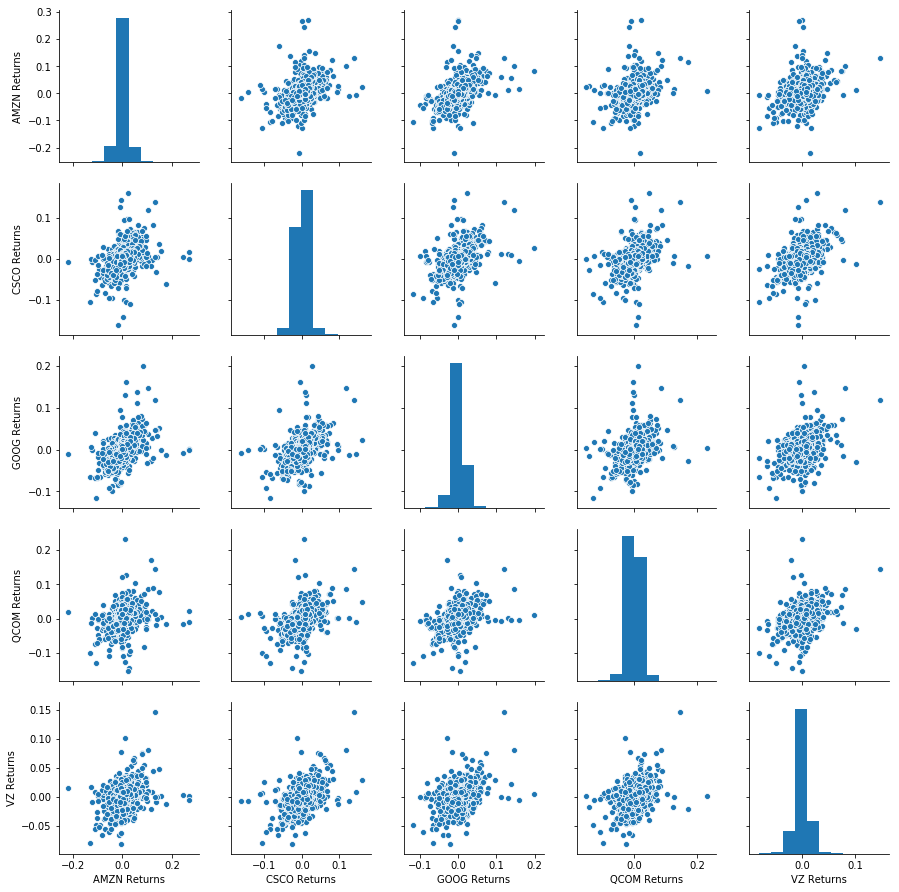

In [36]:
import seaborn as sns
sns.pairplot(returns[1:])

** Using this returns DataFrame, figure out on what dates each stock had the best and worst single day returns.

In [40]:
returns.idxmax()
# AMZN Returns   2007-04-25
# CSCO Returns   2011-08-11
# OOG Returns    2008-04-18
# COM Returns    2019-04-16
# VZ Returns     2008-10-28

returns.idxmin()

AMZN Returns   2006-07-26
CSCO Returns   2010-11-11
GOOG Returns   2008-09-29
QCOM Returns   2015-11-05
VZ Returns     2008-10-22
dtype: datetime64[ns]

In [44]:
returns.loc['2016-01-01':'2018-01-01'].idxmax()

AMZN Returns   2017-10-27
CSCO Returns   2016-02-11
GOOG Returns   2017-10-27
QCOM Returns   2017-11-03
VZ Returns     2017-07-27
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2018?**

- Amazon seems to have the highest standard deviation overall for the entire time period, which also held true for the year 2018. The highest standard deviation can be interpretted as being the riskiest.

In [51]:
returns.std()

AMZN Returns    0.024942
CSCO Returns    0.018176
GOOG Returns    0.018006
QCOM Returns    0.020052
VZ Returns      0.013374
dtype: float64

In [46]:
returns.loc['2018-01-01': '2019-01-01'].std()

AMZN Returns    0.022744
CSCO Returns    0.016695
GOOG Returns    0.017724
QCOM Returns    0.018823
VZ Returns      0.012895
dtype: float64

** Create a distplot using seaborn of the 2018 returns for Amazon **

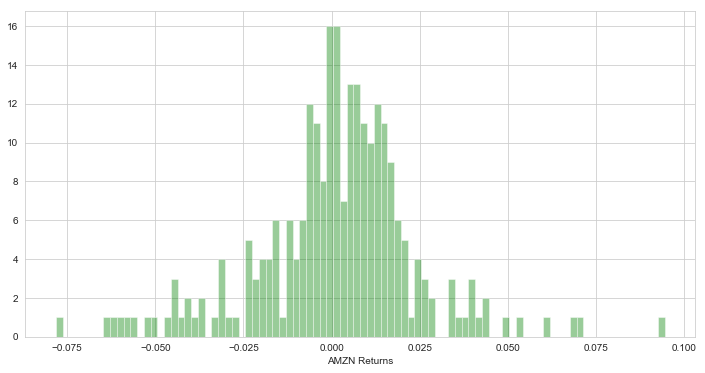

In [61]:
import matplotlib.pyplot as plt
plt.figure(figsize= (12,6))
sns.set_style('whitegrid')
sns.distplot(returns.loc["2018-01-01" : '2019-01-01']['AMZN Returns'], color = 'green', bins = 90, kde =False)

** Create a distplot using seaborn of the 2018 returns for Cisco **

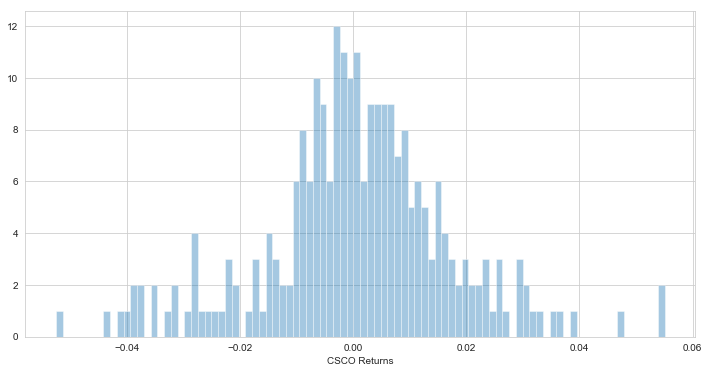

In [63]:
plt.figure(figsize=(12,6))
sns.set_style('whitegrid')
sns.distplot(returns.loc['2018-01-01': '2019-01-01']['CSCO Returns'], bins= 90, kde = False)

____
# More Visualization

Let's get some more visualization of our data to get a better understanding.

### Imports

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

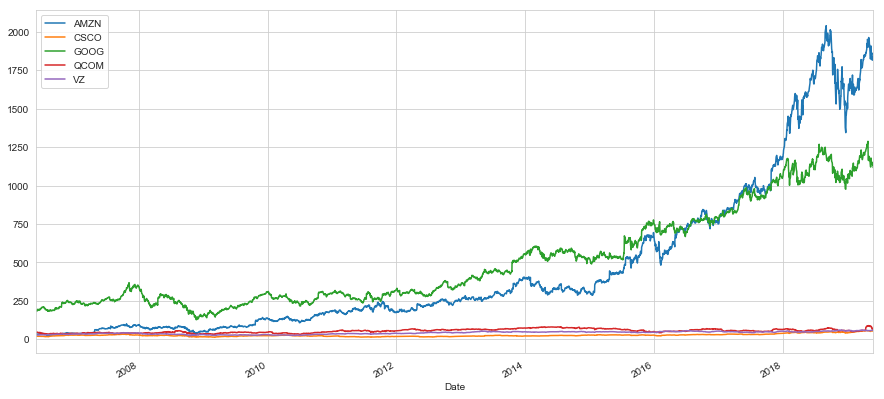

In [69]:
for tick in tickers:
    stocks[tick]['Close'].plot(figsize = (15,7), label = tick)
plt.legend()

In [71]:
stocks.xs(level = 'Stock Info', axis = 1, key= 'Close').iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2018. 

** Plot the rolling 30 day average against the Close Price for Amazon's stock for the year 2018**

<Figure size 864x432 with 0 Axes>

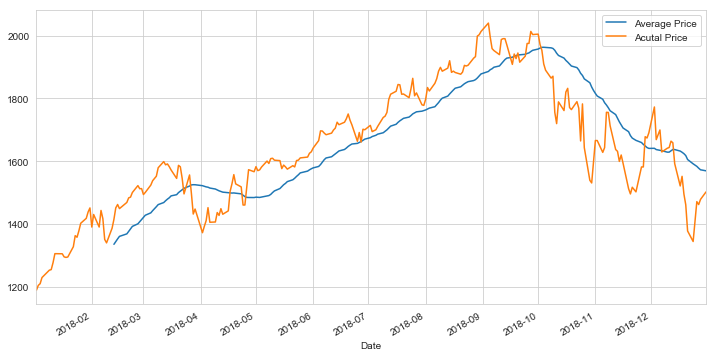

In [75]:
plt.figure(figsize= (12,6))


plt.figure(figsize=(12,6))
stocks['AMZN']['Close'].loc["2018-01-01" : '2019-01-01'].rolling(30).mean().plot(label = 'Average Price')
stocks['AMZN']['Close'].loc["2018-01-01" : '2019-01-01'].plot(label = 'Acutal Price')
plt.legend()

** Create a heatmap of the correlation between the stocks Close Price.**

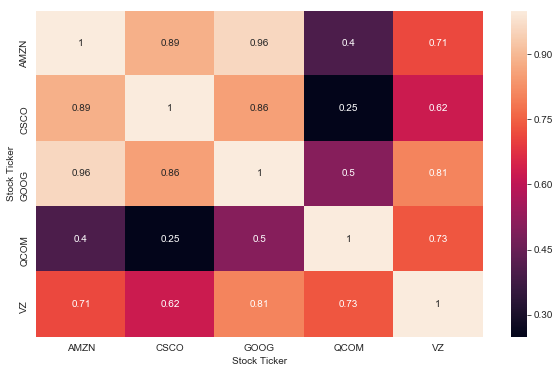

In [78]:
plt.figure(figsize= (10,6))
sns.heatmap(stocks.xs(level = 'Stock Info', key = 'Close', axis = 1).corr(), annot = True)

** Use seaborn's clustermap to cluster the correlations together:**

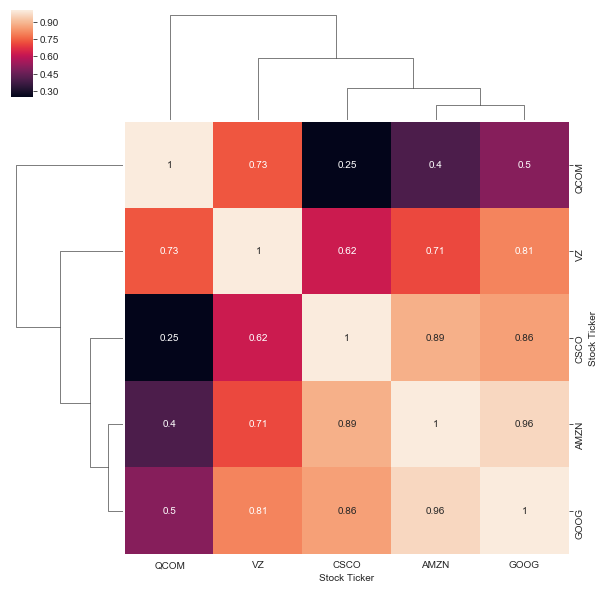

In [79]:
sns.clustermap(stocks.xs(level= 'Stock Info', key = 'Close', axis=1).corr(), annot= True)

# Part 2

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots.

** Use .iplot(kind='candle) to create a candle plot of Amazon's stock from Jan 1st 2016 to Jan 1st 2019.**

In [90]:
AMZN[['Open', 'High', 'Low', 'Close']].loc['2016-01-01':'2019-01-01'].iplot(kind= 'candle')

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Qualcomm for the years 2015-2019.**

In [84]:
QCOM.loc['2015-01-01':'2019-01-01'].ta_plot(study='sma', 
                                          title = 'simple moving averages',
                                          periods = [13,21,55])

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Google for the year 2015-2019.**

In [87]:
GOOG.loc['2015-01-01':'2019-01-01']['Close'].ta_plot(study= 'boll', title= 'Google')

Let's try fitting a predictive model to Qualcomm's dataset.
- First We'll Start off by getting the rolling mean for the rolling mean:

In [120]:
QCOM.rolling(100).mean()

High      Low     Open    Close      Volume  Adj Close
Date                                                                 
2006-05-30      NaN      NaN      NaN      NaN         NaN        NaN
2006-05-31      NaN      NaN      NaN      NaN         NaN        NaN
2006-06-01      NaN      NaN      NaN      NaN         NaN        NaN
2006-06-02      NaN      NaN      NaN      NaN         NaN        NaN
2006-06-05      NaN      NaN      NaN      NaN         NaN        NaN
2006-06-06      NaN      NaN      NaN      NaN         NaN        NaN
2006-06-07      NaN      NaN      NaN      NaN         NaN        NaN
2006-06-08      NaN      NaN      NaN      NaN         NaN        NaN
2006-06-09      NaN      NaN      NaN      NaN         NaN        NaN
2006-06-12      NaN      NaN      NaN      NaN         NaN        NaN
2006-06-13      NaN      NaN      NaN      NaN         NaN        NaN
2006-06-14      NaN      NaN      NaN      NaN         NaN        NaN
2006-06-15      NaN      NaN      NaN      NaN         NaN        NaN
2006-06-16      NaN      NaN      NaN      NaN         NaN        NaN
2006-06-19      NaN      NaN      NaN      NaN         NaN        NaN
2006-06-20      NaN      NaN      NaN      NaN         NaN        NaN
2006-06-21      NaN      NaN      NaN      NaN         NaN        NaN
2006-06-22      NaN      NaN      NaN      NaN         NaN        NaN
2006-06-23      NaN      NaN      NaN      NaN         NaN        NaN
2006-06-26      NaN      NaN      NaN      NaN         NaN        NaN
2006-06-27      NaN      NaN      NaN      NaN         NaN        NaN
2006-06-28      NaN      NaN      NaN      NaN         NaN        NaN
2006-06-29      NaN      NaN      NaN      NaN         NaN        NaN
2006-06-30      NaN      NaN      NaN      NaN         NaN        NaN
2006-07-03      NaN      NaN      NaN      NaN         NaN        NaN
2006-07-05      NaN      NaN      NaN      NaN         NaN        NaN
2006-07-06      NaN      NaN      NaN      NaN         NaN        NaN
2006-07-07      NaN      NaN      NaN      NaN         NaN        NaN
2006-07-10      NaN      NaN      NaN      NaN         NaN        NaN
2006-07-11      NaN      NaN      NaN      NaN         NaN        NaN
...             ...      ...      ...      ...         ...        ...
2019-04-17  56.2072  54.8036  55.4156  55.4822  16643533.0  54.497775
2019-04-18  56.4442  55.0320  55.6507  55.7284  16929615.0  54.753855
2019-04-22  56.7117  55.2779  55.9013  55.9956  17215821.0  55.030740
2019-04-23  57.0275  55.5588  56.1824  56.3055  17681821.0  55.350044
2019-04-24  57.3515  55.8583  56.4969  56.6181  17987535.0  55.671988
2019-04-25  57.6475  56.1566  56.7997  56.9023  18020022.0  55.966026
2019-04-26  57.9246  56.4210  57.0659  57.1876  17939138.0  56.261473
2019-04-29  58.2197  56.7092  57.3477  57.4775  17936389.0  56.561513
2019-04-30  58.4892  56.9857  57.6124  57.7474  17941068.0  56.841926
2019-05-01  58.7766  57.2750  57.8942  58.0338  18064818.0  57.138380
2019-05-02  59.1079  57.5796  58.2091  58.3341  18286205.0  57.442465
2019-05-03  59.4349  57.8929  58.5206  58.6671  18326342.0  57.778826
2019-05-06  59.7394  58.1879  58.8062  58.9772  18278314.0  58.092637
2019-05-07  60.0343  58.4674  59.0937  59.2557  18362946.0  58.375147
2019-05-08  60.3057  58.7332  59.3578  59.5239  18385488.0  58.647492
2019-05-09  60.5703  58.9802  59.6101  59.7808  18441149.0  58.908682
2019-05-10  60.8436  59.2401  59.8683  60.0630  18465195.0  59.194889
2019-05-13  61.1087  59.5033  60.1248  60.3319  18465603.0  59.467845
2019-05-14  61.3877  59.7693  60.3906  60.6154  18485298.0  59.755359
2019-05-15  61.6727  60.0576  60.6707  60.9111  18429382.0  60.054837
2019-05-16  61.9413  60.3183  60.9364  61.1755  18436947.0  60.323263
2019-05-17  62.1997  60.5714  61.1787  61.4420  18250158.0  60.593597
2019-05-20  62.4341  60.7964  61.4212  61.6717  18494201.0  60.827327
2019-05-21  62.6645  61.0335  61.6678  61.8896  18482507.0  61.049627
2019-05-22  62.8180  61.1

Since there seems to be missing values, we'll just plot these out to get a visual representation of the moving averages

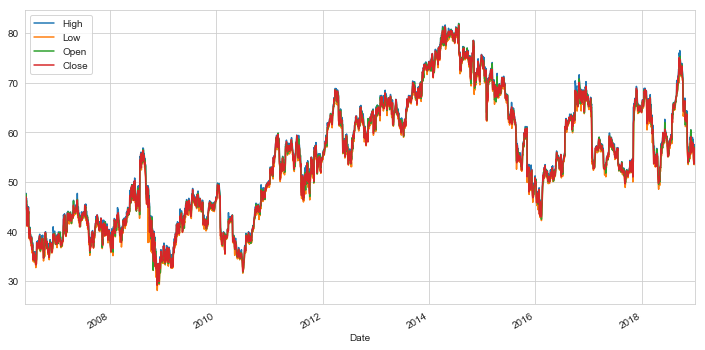

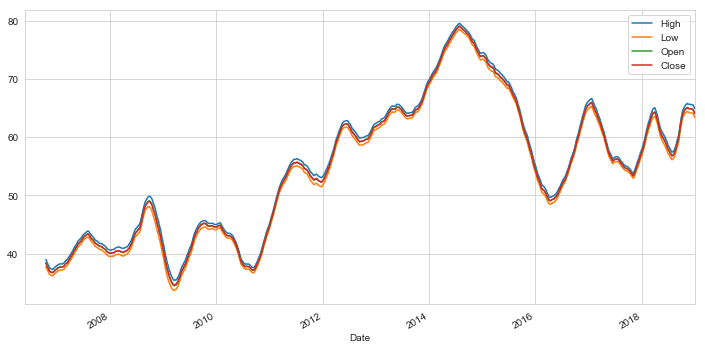

In [128]:

QCOM.loc[: '2019-01-01'][['High', 'Low', 'Open', 'Close']].plot(figsize = (12,6), label = 'Acutal Closing Price')
QCOM.loc[: '2019-01-01'][['High', 'Low', 'Open', 'Close']].rolling(100).mean().plot(figsize= (12,6), label = 'Rolling Averages')

In [129]:
returns.reset_index()
#BAC.reset_index(inplace= True)
#BAC.drop(['level_0', 'index', 'Date'], axis = 1, inplace = True)
X= QCOM.drop('Close', axis= 1)
y = QCOM['Close']
QCOM.columns

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators= 100, random_state = 0)
regressor.fit(X,y)
y_pred = regressor.predict([[X]])
y_pred

X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X,y, color ='red')
plt.plot(X_grid, regressor.predict(X_grid), color ='blue')
plt.xlabel('Position Level')
plt.ylabel('Salaries')
plt.title('Truth or Bluff? (Random Forest Example)')
plt.plot()

ValueError: cannot copy sequence with size 3273 to array axis with dimension 5

In [101]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators= 10)

In [107]:
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

X_grid = np.arange(min(X), max(X), 0.01)
#X_grid = X_grid.reshape((len(X_grid), 1))
#plt.scatter(X,y, color ='red')
#plt.plot(X_grid, regressor.predict(X_grid), color ='blue')
#plt.xlabel('Position Level')
#plt.ylabel('Salaries')
#plt.title('Truth or Bluff? (Random Forest Example)')
#plt.plot()


TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [108]:
# Let's Make a loop to see which which n_estimators performed the best.
error_rate = []
for estimators in range(1,100):
    regressor = RandomForestRegressor(n_estimators= estimators)
    
    regressor.fit(X_train, y_train)
    
    prediction = regressor.predict(X_test)
    error_rate.append(np.mean(prediction != y_test))   



# STILL WORKING ON THIS... 
TO BE CONTINUED... ;)
